# Libraries and utils

In [12]:
import warnings
warnings.filterwarnings("ignore")

import pickle
import nltk
from gensim.models import Word2Vec
import multiprocessing
import pandas as pd
from collections import defaultdict

from nltk.stem import WordNetLemmatizer
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

from collections import defaultdict

import pandas as pd

In [3]:
# inspired by https://blog.cambridgespark.com/tutorial-build-your-own-embedding-and-use-it-in-a-neural-network-e9cde4a81296
lemmatizer=WordNetLemmatizer()

def word_splt(lst): 
    return list(map(lambda word:[word], lst)) 

def lemmatize_sent(sent):
    return [lemmatizer.lemmatize(word.lower()) for word in sent]

def embedd_by_topic(ind):   
    text = new_df_g['post'][ind]
    
    text_l = text.split('.')
    text_l=word_splt(text_l)
    tokens = [sub.split() for subl in  text_l for sub in subl] 
    
    lemmatized = []
    for i in tokens:
        lemmatized.append(lemmatize_sent(i))

    
    embedding_dim=300
    
    w_v = Word2Vec(lemmatized, size=embedding_dim, window=5, 
                   min_count=5, negative=15, iter=10, workers=multiprocessing.cpu_count())

    word_vectors = w_v.wv
    
    return word_vectors
    

# Data preparation

In [4]:
!pwd

/Users/elena/Desktop/Metis/projects/5_project/Blogger_Boost/code


In [5]:
with open('../../blogger_com_data_19320_6_v2.pkl', 'rb') as picklefile:
    df = pickle.load(picklefile)

In [6]:
with open('../../data/blogger_com_data_19320_tsne3d.pkl', 'rb') as picklefile:
    tsne = pickle.load(picklefile)

In [7]:
#tsne

In [8]:
new_df = pd.merge(df, tsne,  how='left', left_on=['blogger_id'], right_on = ['blogger_id'])

In [9]:
new_df = new_df[['blogger_id', 'post', 'prime_topic']]

In [10]:
new_df_g = new_df.groupby(['prime_topic'])['post'].apply(' '.join).reset_index()

# Training

In [17]:
embds = defaultdict()

for i in range(new_df_g['post'].shape[0]):
    embds[new_df_g['prime_topic'][i]] = embedd_by_topic(i)

In [18]:
embds

defaultdict(None,
            {'blogging': <gensim.models.keyedvectors.Word2VecKeyedVectors at 0x7f8fff6b6710>,
             'faith': <gensim.models.keyedvectors.Word2VecKeyedVectors at 0x7f8e9c4c7cd0>,
             'jargon': <gensim.models.keyedvectors.Word2VecKeyedVectors at 0x7f8e78af8d10>,
             'love_relationship': <gensim.models.keyedvectors.Word2VecKeyedVectors at 0x7f8e94933fd0>,
             'mundane': <gensim.models.keyedvectors.Word2VecKeyedVectors at 0x7f8ec25507d0>,
             'politics': <gensim.models.keyedvectors.Word2VecKeyedVectors at 0x7f8e33123d50>,
             'teen_fun_days': <gensim.models.keyedvectors.Word2VecKeyedVectors at 0x7f8e90c59610>})

In [49]:
with open('../../topic_embeds.pkl', 'wb') as picklefile:
    pickle.dump(embds, picklefile)

In [143]:
with open('../../topic_embeds.pkl', 'rb') as picklefile:
    embds = pickle.load(picklefile)

# Similar by word

In [144]:
embds['Leisure'] = embds['blogging']   
del embds['blogging']

embds['Faith'] = embds['faith']   
del embds['faith']

embds['Slang Pleople'] = embds['jargon']   
del embds['jargon']

embds['Relationships'] = embds['love_relationship']   
del embds['love_relationship']


embds['Politics'] = embds['politics']   
del embds['politics']

embds['Teen Spirit'] = embds['teen_fun_days']   
del embds['teen_fun_days']


embds['Days of My Life'] = embds['mundane']   
del embds['mundane']



In [ ]:
old_keys = embds.keys()

In [145]:
embds.keys()

dict_keys(['Leisure', 'Faith', 'Slang Pleople', 'Relationships', 'Politics', 'Teen Spirit', 'Days of My Life'])

In [117]:
embds['blogging'].similar_by_word('happy')

[('adore', 0.5996954441070557),
 ('loved', 0.59117591381073),
 ('hate', 0.5898413062095642),
 ('love,', 0.5669140815734863),
 ('loathe', 0.5076751708984375),
 ('appreciate', 0.4776380658149719),
 ('envy', 0.4630279541015625),
 ('admire', 0.46001961827278137),
 ('despise', 0.4539681673049927),
 ('hated', 0.43722397089004517)]

In [44]:
embds['faith'].similar_by_word('partner')

[('families,', 0.6554819345474243),
 ('mentor', 0.6190775632858276),
 ('equipping', 0.611336886882782),
 ('parents,', 0.6066656708717346),
 ('peer', 0.5965054035186768),
 ('role', 0.5963485836982727),
 ('children,', 0.5884504914283752),
 ('heritage', 0.5790526866912842),
 ('students,', 0.5775643587112427),
 ('husband,', 0.5733423233032227)]

In [46]:
embds['teen_fun_days'].similar_by_word('partner')

[('parents?', 0.6192609071731567),
 ('sibling', 0.5991154909133911),
 ('life?', 0.5944355726242065),
 ('touch,', 0.5858711004257202),
 ('daughter', 0.5853942632675171),
 ('weakness', 0.581780195236206),
 ('room?', 0.5775052309036255),
 ('wife', 0.5759271383285522),
 ('campaign', 0.5754979252815247),
 ('boyfriend,', 0.5688776969909668)]

In [47]:
embds['politics'].similar_by_word('partner')

[('spouse', 0.6131894588470459),
 ('colleague', 0.6001355051994324),
 ('employer', 0.592117190361023),
 ('countryman', 0.5882123112678528),
 ('parent', 0.5783097743988037),
 ('parents,', 0.5709174275398254),
 ('daughter,', 0.5668789744377136),
 ('employment,', 0.5556104779243469),
 ('workplace', 0.5524344444274902),
 ('profession', 0.5490902662277222)]

In [48]:
embds['jargon'].similar_by_word('partner')

[('girlfriend', 0.6918103694915771),
 ('boyfriend', 0.6451742053031921),
 ('supervisor', 0.6375335454940796),
 ('beloved', 0.6353716850280762),
 ('husband', 0.6211665272712708),
 ('partner,', 0.6136278510093689),
 ('wife', 0.6073704361915588),
 ('daughter', 0.6067254543304443),
 ('buddy', 0.6054929494857788),
 ('friend', 0.6026976108551025)]

In [8]:
embds['mundane'].similar_by_word('partner')

[('partner,', 0.6203582882881165),
 ('spouse', 0.57475745677948),
 ('husband', 0.5431606769561768),
 ('companion', 0.5348480939865112),
 ('boyfriend', 0.5324077606201172),
 ('girlfriend', 0.5263009071350098),
 ('boyfriend,', 0.5095653533935547),
 ('ex', 0.503070592880249),
 ('career', 0.4971277117729187),
 ('husband,', 0.49354708194732666)]

In [13]:
embds['mundane'].similar_by_word('spouse')

[('counterpart', 0.5786188840866089),
 ('husband', 0.5766229629516602),
 ('partner', 0.57475745677948),
 ('partner,', 0.5703619718551636),
 ('actions,', 0.5566568374633789),
 ('wife,', 0.5459825992584229),
 ('wife', 0.5448347330093384),
 ('identity', 0.5368969440460205),
 ('genitals', 0.5339117050170898),
 ('parent', 0.5335367321968079)]

In [202]:
d = defaultdict()

for i in embds.keys():
    d[i] = embds[i].n_similarity('partner', 'responsibility')
df = pd.DataFrame([d], columns=d.keys()).T   

In [203]:
d = defaultdict()

for i in embds.keys():
    d[i] = embds[i].n_similarity('partner', 'fun')
df1 = pd.DataFrame([d], columns=d.keys()).T 

In [204]:
x = pd.concat([df, df1], axis=1)
x.columns = ['responsibility', 'fun']

In [205]:
x = x.reset_index()

In [206]:
x

,index,responsibility,fun
0,Leisure,0.723338,0.651968
1,Faith,0.689937,0.516153
2,Slang Pleople,0.619152,0.568687
3,Relationships,0.742533,0.658080
4,Politics,0.664964,0.430363
5,Teen Spirit,0.711522,0.679781
6,Days of My Life,0.775454,0.634206


In [67]:
x = pd.melt(x, id_vars='index', value_vars=['love', 'business'])

In [152]:
import numpy as np

flatui = ["#ACF2DC", "#757575"]
plt.figure(figsize=(10,10))

ax = sns.barplot(x="index", y="value", hue="variable", data=x, palette=flatui)

h,l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc='center left', bbox_to_anchor=(1, 0.81), ncol=2, fontsize=20, markerscale=3, title=False, 
         fancybox=True, shadow=True, )

ax.legend(np.arange(2), labels=['home', 'work'], bbox_to_anchor=(1, 0.81), ncol=2, fontsize=20, markerscale=10, title=False,
         fancybox=True, shadow=True)
ax.set_title('Partner',fontsize=30, loc='left', pad=20);

ValueError: Could not interpret input 'value'

<Figure size 720x720 with 0 Axes>

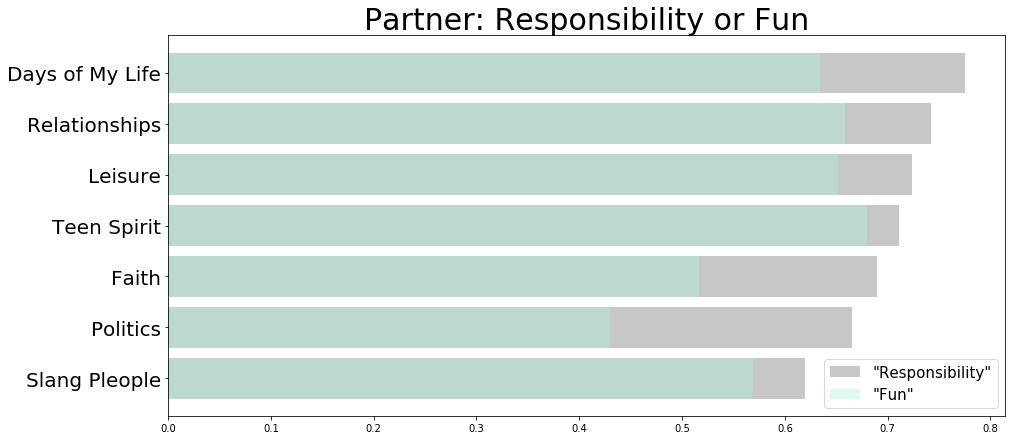

In [215]:
x = x.sort_values(by=['responsibility'], ascending=True)
plt.figure(figsize=(15,7))
plt.barh(x['index'], x['responsibility'], color="#757575", alpha=0.4)
plt.barh(x['index'], x['fun'], color="#ACF2DC", alpha=0.4)
#plt.bar(x['index'], x['work'], color="#757575", alpha=0.7)
plt.yticks(fontsize = 20);
plt.legend(np.arange(2), labels=('"Responsibility"', '"Fun"'), fontsize=15, loc='lower right')
plt.title('Partner: Responsibility or Fun', fontsize=30);


In [114]:
list1 = ['Days of My Life','Relationships',
                          'Leisure','Politics', 'Faith', 'Teen Spirit', 
                          'Slang Pleople']
newlist1[::-1]

['Slang Pleople',
 'Teen Spirit',
 'Faith',
 'Politics',
 'Leisure',
 'Relationships',
 'Days of My Life']

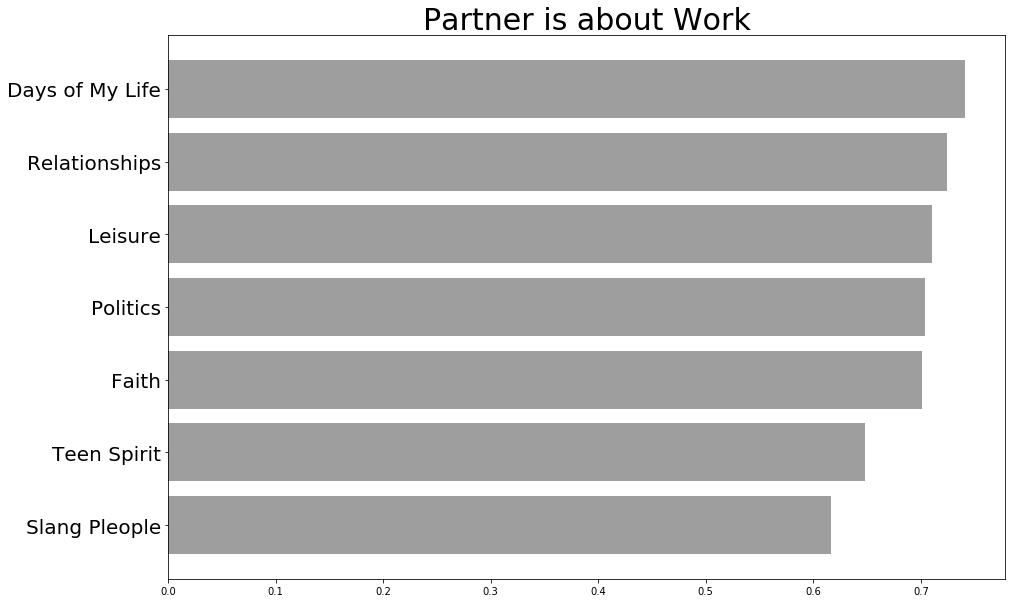

In [130]:
x = x.sort_values(by=['business'], ascending=True)
plt.figure(figsize=(15,10))
plt.barh(x['index'], x['business'], color="#757575", alpha=0.7)
plt.yticks(np.arange(7), ('Slang Pleople','Teen Spirit','Faith',
                          'Politics', 'Leisure', 'Relationships',
                          'Days of My Life'), fontsize = 20);
#
plt.title('Partner is about Work', fontsize=30);



In [68]:
x

,index,variable,value
0,blogging,home,0.682735
1,faith,home,0.676519
2,jargon,home,0.614945
3,love_relationship,home,0.791464
4,mundane,home,0.778235
5,politics,home,0.772431
6,teen_fun_days,home,0.655142
7,blogging,work,0.801888
8,faith,work,0.707770
9,jargon,work,0.691449


# Most similar: positive and negative

In [53]:
result = embds['faith'].most_similar(positive=['partner'], negative=['family'])
print('Most similar to "partner" and dissimilar to "family": ', result[:10])

Most similar to "partner" and dissimilar to "family":  [('examine', 0.3897210359573364), ('ethical', 0.3734012842178345), ('establish', 0.37096452713012695), ('us', 0.3697802424430847), ('pose', 0.3692972660064697), ('authentic', 0.36855965852737427), ('self:', 0.36594876646995544), ('regarding', 0.3653610944747925), ('instrument,', 0.36514902114868164), ('serf', 0.363373339176178)]


# Compare words similarity for different groups

In [59]:
embds['jargon'].n_similarity('love', 'friendship')

0.6556965

In [60]:
embds['politics'].n_similarity('love', 'friendship')

0.6491781

In [61]:
embds['teen_fun_days'].n_similarity('love', 'friendship')

0.73877794

In [64]:
embds['faith'].n_similarity('love', 'friendship')

0.60260856

In [65]:
embds['blogging'].n_similarity('love', 'friendship')

0.594294

In [69]:
embds['blogging'].most_similar_cosmul(positive='love', negative='hate', topn=10)

[('shad', 1.6901882886886597),
 ("'01", 1.625874638557434),
 ('amazes', 1.6206209659576416),
 ('brings', 1.6148300170898438),
 ('0:', 1.6062898635864258),
 ('published:', 1.5981762409210205),
 ('blogs:', 1.597554326057434),
 ('sophies', 1.5913939476013184),
 ('vh-1', 1.5907223224639893),
 ('calendar)', 1.584105134010315)]

# Visualize

Inspired by https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim 

In [74]:
vocab = list(embds['blogging'].wv.vocab)
X = embds['blogging'][vocab]

In [76]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [79]:
vocab_faith = list(embds['faith'].wv.vocab)
X_faith = embds['faith'][vocab_faith]
tsne_faith = TSNE(n_components=2)
X_tsne_faith = tsne_faith.fit_transform(X_faith)

In [77]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y']) #words from vocab are indeces

In [89]:
df_test = df.iloc[:100, :]

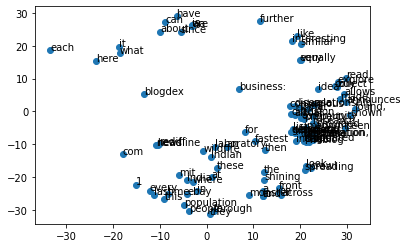

In [90]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df_test['x'], df_test['y'])
for word, pos in df_test.iterrows():
    ax.annotate(word, pos)
    
#fig.savefig()